# Logistic Regression - Wisconsin Breast Cancer dataset:

**Wisconsin Breast Cancer** dataset collects features of the cell cores present in images calculated from a digitalized image of a fine needle aspirate of a breast mass. The data, found in a *.csv* file, contains a total of 569 instances and 32 attributes. In this notebook we will use a **Logistic Regression** model to classify between benign and malignant cells.

Firstly, we are going to load and transform the data before carrying out exploratory analysis:


In [1]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv("./cancer.csv", index_col=0)  # Load data from csv

display(data.head())  # Display the dataset first instances

Y = data['diagnosis'].map({'M':1, 'B':0})[:, np.newaxis]  # Transform diagnosis (malignant or benign) to binary encoding
X = data.iloc[:,1:]
X.drop(X.columns[len(X.columns)-1], axis=1, inplace=True)  # Delete last column, since are NaN values

X = X.reindex(sorted(X.columns), axis=1)  # sort based on column name

display(X.head())  # Display X first instances

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1001.0,153.40,2019.0,0.27760,0.04904,0.6656,0.14710,0.01587,0.2654,0.3001,...,25.38,0.11840,0.006399,0.1622,0.2419,0.03003,0.4601,10.38,0.9053,17.33
842517,1326.0,74.08,1956.0,0.07864,0.01308,0.1866,0.07017,0.01340,0.1860,0.0869,...,24.99,0.08474,0.005225,0.1238,0.1812,0.01389,0.2750,17.77,0.7339,23.41
84300903,1203.0,94.03,1709.0,0.15990,0.04006,0.4245,0.12790,0.02058,0.2430,0.1974,...,23.57,0.10960,0.006150,0.1444,0.2069,0.02250,0.3613,21.25,0.7869,25.53
84348301,386.1,27.23,567.7,0.28390,0.07458,0.8663,0.10520,0.01867,0.2575,0.2414,...,14.91,0.14250,0.009110,0.2098,0.2597,0.05963,0.6638,20.38,1.1560,26.50
84358402,1297.0,94.44,1575.0,0.13280,0.02461,0.2050,0.10430,0.01885,0.1625,0.1980,...,22.54,0.10030,0.011490,0.1374,0.1809,0.01756,0.2364,14.34,0.7813,16.67


The first representation above corresponds to the data as it is loaded. The second one, with the data sorted alphabetically (useful to visualize possible grouped correlations) and selecting only the necessary columns (separation of the target variable and elimination of columns with NaN values).

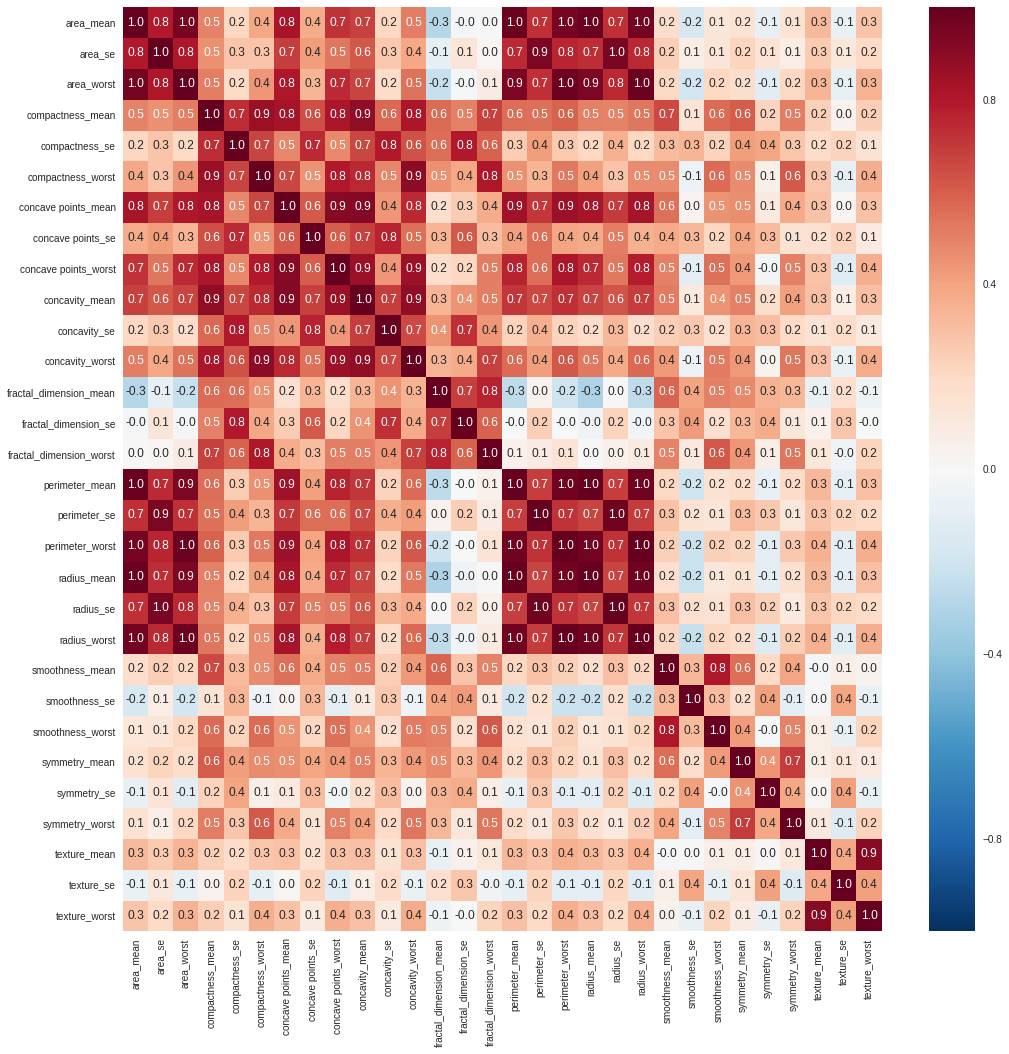

In [2]:
corr_mat = X.corr()  # Dataframe correlation matrix

plt.subplots(figsize=(17,17))

sb.heatmap(corr_mat, cmap='RdBu_r', annot=True, fmt= '.1f',  # one decimal value in cell
            xticklabels=corr_mat.columns.values,  # plot the atribute names
            yticklabels=corr_mat.columns.values)

plt.show()

As the correlation matrix shows, there are many highly correlated variables, for example:

- ***radius_mean*** (mean of distances from center to points on the perimeter) with ***perimeter_mean*** and ***area_mean***. In general, this kind of lenght/area metrics of the cell cores are highly correlated.

- ***compactness_mean*** with ***concavity_mean*** and ***fractal_dimension_mean***

Since there are a large number of correlated variables, it would be possible to apply **dimensional reduction techniques** in order to eliminate unimportant or highly correlated variables. Dimensionality reduction is often required because the space needed for storing data can be reduced, and less dimensions means less model training times, among other benefits. [Here](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/) is more information about the most common dimensional reduction techniques.

## Logistic Regression model

First of all, to control the appearance of overfitting in a simple way and to measure the ability of our model to generalize its predictions, we are going to divide the dataset randomly in a training dataset, with which the model is adjusted, and in a test dataset, with which the model is evaluated. We use the function ***sklearn.train_test_split()*** so that the size of the train/test datasets is 70/30%. 

To eliminate the effects of randomness on data partitioning (*random_state* selection), each training was executed and the score of the model in question was measured 1000 times, so that the average score was calculated to draw conclusions:

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression

Several ways of pre-processing the data and training the model have been evaluated in order to compare them and select the one that achieves the highest score:

### Classifier based on standard logistic regression

In [4]:
scores1 = []

for i in range(1000):

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y.ravel(), test_size=0.3)

  LR_classifier = LogisticRegression(solver='liblinear').fit(X_train, Y_train)  # liblinear solver: a good choice for small datasets

  scores1.append(LR_classifier.score(X_test, Y_test))
    
print("Avg. score LR: ", np.mean(scores1))

Avg. score LR:  0.9485672514619884


### Classifier based on logistic regression with scaled data

Standardizing data, centering to the mean and component wise scale to unit variance, using ***sklearn.preprocessing.scale***:



In [5]:
from sklearn.preprocessing import scale

scores2 = []

for i in range(1000):

  X_train, X_test, Y_train, Y_test = train_test_split(scale(X, with_mean=True, with_std=True), Y.ravel(), test_size=0.3)

  LRSD_classifier = LogisticRegression(solver='liblinear').fit(X_train, Y_train)

  scores2.append(LRSD_classifier.score(X_test, Y_test))
    
print("Avg. score LR+SD: ", np.mean(scores2))

Avg. score LR+SD:  0.9765672514619881


### Classifier based on logistic regression with polynomial combinations of the features

Training the models with polynomial combinations of the features using ***sklearn.preprocessing.PolynomialFeatures*** (it has only been tested with 2 degrees, since for more degrees the computing time is exponentially increased):


In [6]:
from sklearn.preprocessing import PolynomialFeatures

scores3 = []

for i in range(1000):

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(X), Y.ravel(), test_size=0.3)    
  LRPF_classifier = LogisticRegression(solver='liblinear').fit(X_train, Y_train)

  scores3.append(LRPF_classifier.score(X_test, Y_test))

print("Avg. score LR+PF: ", np.mean(scores3))

Avg. score LR+PF:  0.9564444444444445


### Classifier based on logistic regression with scaled data plus polynomial combinations of the features:

In [7]:
scores4 = []

for i in range(1000):

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(scale(X, with_mean=True, with_std=True)),
                                                      Y.ravel(), test_size=0.3)    
  LRSDPF_classifier = LogisticRegression(solver='liblinear').fit(X_train, Y_train)

  scores4.append(LRSDPF_classifier.score(X_test, Y_test))

print("Avg. score LR+SD+PF: ", np.mean(scores4))

Avg. score LR+SD+PF:  0.9616842105263158


### Predictions:

Thus, it has been empirically proven that, in the long run, the most effective model is a classifier based on logistic regression with scaled data. We are going to build this model again and make some predictions:



In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(scale(X, with_mean=True, with_std=True), Y.ravel(), test_size=0.3)

LRSD_classifier = LogisticRegression(solver='liblinear').fit(X_train, Y_train)

print("Avg. score LR+SD: ", LRSD_classifier.score(X_test, Y_test))

Avg. score LR+SD:  0.9707602339181286


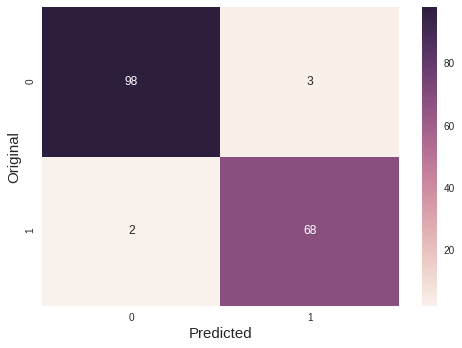

In [28]:
from sklearn.metrics import confusion_matrix

Ypred = LRSD_classifier.predict(X_test)

matConf = confusion_matrix(Y_test, Ypred)

ax = sb.heatmap(matConf, annot=True, fmt=".0f")  # Plot the confusion matrix
ax.set_ylabel('Original', fontsize=15)
ax.set_xlabel('Predicted', fontsize=15)
plt.show()

As we can see in the confusion matrix, the classifier guesses most predictions, except for **3 false positives** and **2 false negatives**. The quality of the predictions is expected to improve further using Neural Network models, something I've exposed in the corresponding section of the repository.